In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Hasil

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hasil Model Individu

In [10]:
# Daftar fitur numerik yang perlu di-scaling
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Scaling fitur numerik setelah split (hindari leakage)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model-model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=3,               # batasi kedalaman
        min_samples_split=10,      # minimal sampel untuk split
        min_samples_leaf=5,         # minimal sampel tiap daun
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=3,               # batasi kedalaman
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

In [12]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv)
    mean_score = scores.mean()
    model_cv_scores[name] = mean_score
    print(f"{name} Mean CV Accuracy: {mean_score:.4f}")

Logistic Regression Mean CV Accuracy: 0.8549
Decision Tree Mean CV Accuracy: 0.8220
Random Forest Mean CV Accuracy: 0.8768
SVM Mean CV Accuracy: 0.8841
KNN Mean CV Accuracy: 0.8537


In [13]:
top_models = sorted(model_cv_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print("\n3 Model Terbaik berdasarkan CV Accuracy:")
for name, score in top_models:
    print(f"{name}: {score:.4f}")


3 Model Terbaik berdasarkan CV Accuracy:
SVM: 0.8841
Random Forest: 0.8768
Logistic Regression: 0.8549


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nEvaluasi di Test Set:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")



Evaluasi di Test Set:

Model: Logistic Regression
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Akurasi: 0.7951

Model: Decision Tree
Confusion Matrix:
[[69 33]
 [12 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Akurasi: 0.7805

Model: Random Forest
Confusion Matrix:
[[74 28]
 [14 89]]
Classification Report:
              precision    recall  f1-s

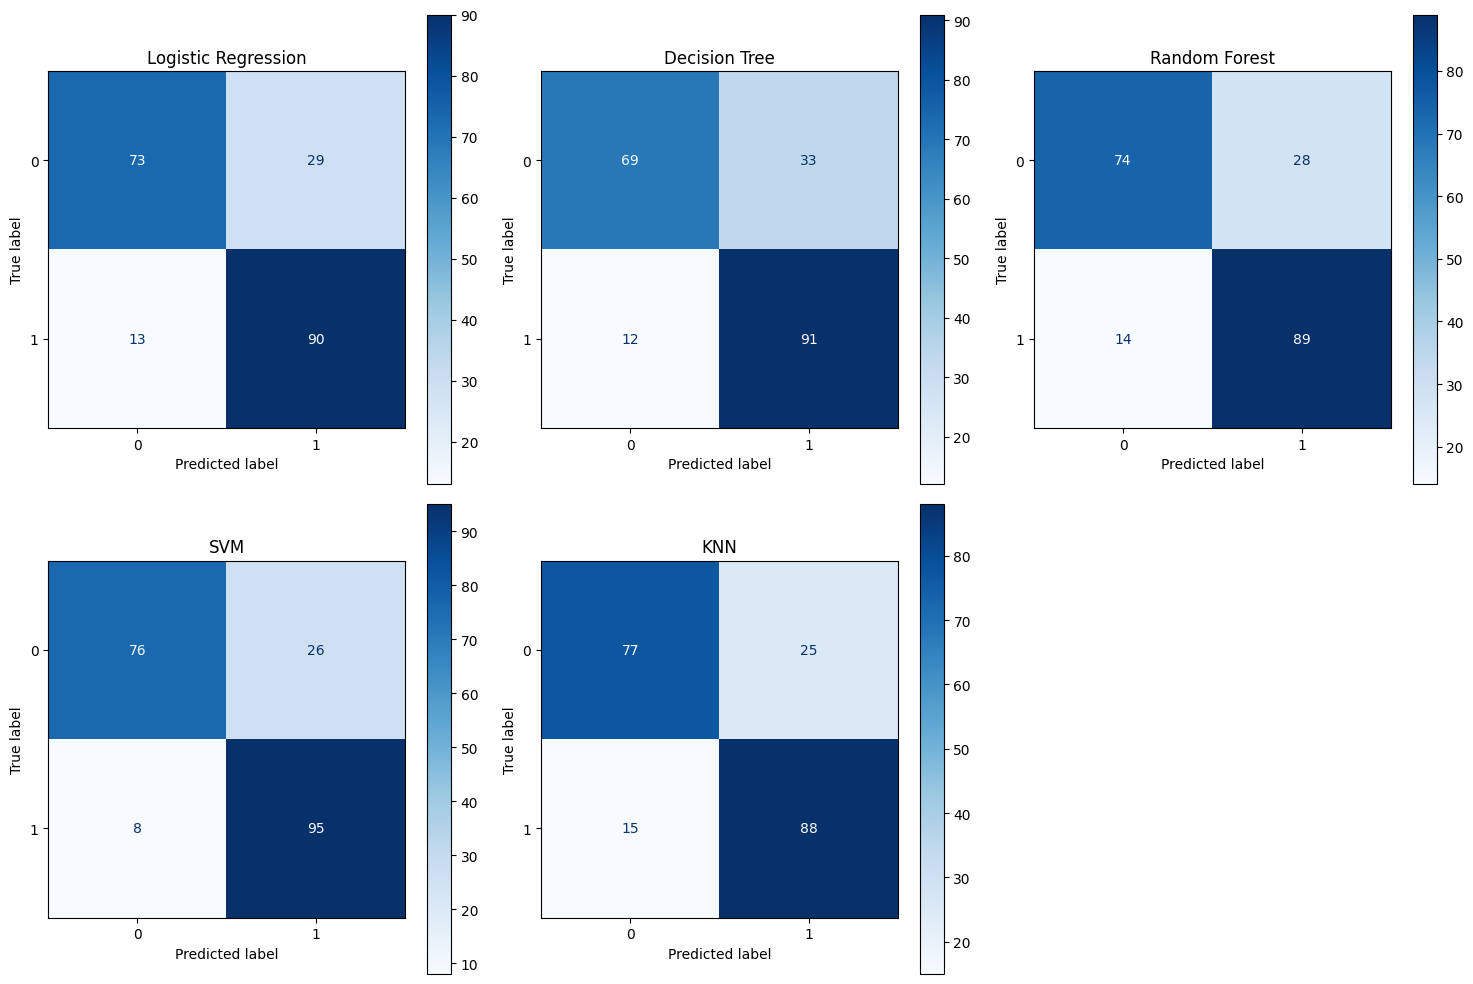

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix tiap model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.subplot(2, 3, i)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title(f"{name}")

plt.tight_layout()
plt.show()

## Ensamble : Voting

In [16]:
# Voting Classifier (soft)
from sklearn.ensemble import VotingClassifier

# Ambil 3 model terbaik
top_model_objs = [(name, models[name]) for name, _ in top_models]

# Voting Classifier (gunakan soft voting kalau model support probabilitas)
voting_soft_clf = VotingClassifier(estimators=top_model_objs, voting='soft', n_jobs=-1)
voting_soft_clf.fit(X_train_scaled, y_train)

y_pred_voting_soft = voting_soft_clf.predict(X_test_scaled)

# Evaluasi Voting Soft
print("\n🔵 Voting Classifier (Soft)")
print(confusion_matrix(y_test, y_pred_voting_soft))
print(classification_report(y_test, y_pred_voting_soft))
acc_voting_soft = accuracy_score(y_test, y_pred_voting_soft)
print(f"Akurasi: {acc_voting_soft:.4f}")


🔵 Voting Classifier (Soft)
[[73 29]
 [ 7 96]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       102
           1       0.77      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

Akurasi: 0.8244


In [18]:
from sklearn.model_selection import cross_val_score, KFold

cv_soft_voting = KFold(n_splits=5, shuffle=True, random_state=42)
scores_soft_voting = cross_val_score(voting_soft_clf, X_train_scaled, y_train, cv=cv_soft_voting)

# Hasil evaluasi soft voting
print("📊 [SOFT VOTING CLASSIFIER]")
print("Cross-Validation Scores:", scores_soft_voting)
print(f"Mean Accuracy: {scores_soft_voting.mean():.4f}")
print(f"Standard Deviation: {scores_soft_voting.std():.4f}")


📊 [SOFT VOTING CLASSIFIER]
Cross-Validation Scores: [0.92073171 0.87804878 0.87804878 0.90853659 0.85365854]
Mean Accuracy: 0.8878
Standard Deviation: 0.0240


In [19]:
# Voting Classifier (hard)
from sklearn.ensemble import VotingClassifier

# Ambil 3 model terbaik
top_model_objs = [(name, models[name]) for name, _ in top_models]

# Voting Classifier (gunakan soft voting kalau model support probabilitas)
voting_hard_clf = VotingClassifier(estimators=top_model_objs, voting='hard', n_jobs=-1)
voting_hard_clf.fit(X_train_scaled, y_train)

y_pred_voting_hard = voting_hard_clf.predict(X_test_scaled)

# Evaluasi Voting Hard
print("\n🟢 Voting Classifier (Hard)")
print(confusion_matrix(y_test, y_pred_voting_hard))
print(classification_report(y_test, y_pred_voting_hard))
acc_voting_hard = accuracy_score(y_test, y_pred_voting_hard)
print(f"Akurasi: {acc_voting_hard:.4f}")


🟢 Voting Classifier (Hard)
[[72 30]
 [ 7 96]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       102
           1       0.76      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

Akurasi: 0.8195


In [20]:
cv_hard_voting = KFold(n_splits=5, shuffle=True, random_state=42)
scores_hard_voting = cross_val_score(voting_hard_clf, X_train_scaled, y_train, cv=cv_hard_voting)

print("📊 [HARD VOTING CLASSIFIER]")
print("Cross-Validation Scores:", scores_hard_voting)
print(f"Mean Accuracy: {scores_hard_voting.mean():.4f}")
print(f"Standard Deviation: {scores_hard_voting.std():.4f}")


📊 [HARD VOTING CLASSIFIER]
Cross-Validation Scores: [0.92682927 0.87804878 0.86585366 0.90853659 0.83536585]
Mean Accuracy: 0.8829
Standard Deviation: 0.0321


## Ensamble : Stacking

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Contoh 3 model terbaik berdasarkan akurasi sebelumnya
top_model_objs = [
    ("rf", RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)),
    ("svm", SVC(probability=True, random_state=42)),  # penting: probability=True agar bisa stacking
    ("knn", KNeighborsClassifier())
]

# Meta-learner (bisa Logistic Regression, RandomForest, dll)
meta_learner = LogisticRegression(random_state=42)

# Inisialisasi stacking classifier
stacking_clf = StackingClassifier(
    estimators=top_model_objs,
    final_estimator=meta_learner,
    passthrough=True  # True: base features + predictions masuk ke meta-learner
)

# Training model stacking
stacking_clf.fit(X_train_scaled, y_train)

# Prediksi & Evaluasi
y_pred_stack = stacking_clf.predict(X_test_scaled)

print("📊 [STACKING CLASSIFIER]")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print(f"Akurasi: {accuracy_score(y_test, y_pred_stack):.4f}")


📊 [STACKING CLASSIFIER]
Confusion Matrix:
 [[79 23]
 [ 7 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       102
           1       0.81      0.93      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Akurasi: 0.8537


In [23]:
cv_stacking = KFold(n_splits=5, shuffle=True, random_state=42)
scores_stacking = cross_val_score(stacking_clf, X_train_scaled, y_train, cv=cv_stacking)

print("📊 [STACKING CLASSIFIER]")
print("Cross-Validation Scores:", scores_stacking)
print(f"Mean Accuracy: {scores_stacking.mean():.4f}")
print(f"Standard Deviation: {scores_stacking.std():.4f}")

📊 [STACKING CLASSIFIER]
Cross-Validation Scores: [0.92682927 0.84756098 0.89634146 0.90853659 0.85365854]
Mean Accuracy: 0.8866
Standard Deviation: 0.0310


## Save Model

In [24]:
import pickle

# Simpan model Voting Soft ke file
with open('voting_soft_model.pkl', 'wb') as f:
    pickle.dump(voting_soft_clf, f)

print("✅ Model soft voting berhasil disimpan sebagai 'voting_soft_model.pkl'")


✅ Model soft voting berhasil disimpan sebagai 'voting_soft_model.pkl'


In [25]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [26]:
with open('num_features.pkl', 'wb') as f:
    pickle.dump(num_features, f)